

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

Here i will perform my anlysis on the NO-SHOW APPOINTMENTS which is collected dataset from 100,000 medical appointments in brazil ,focusing on the most factors affecting whether the patient will show up for their shceduled appointment or no 
the dataset consists from 1 table which is divided into 110527 rows  and 14 columns ,including patient id ,appointment id ,gender, ScheduledDay	,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received and	No-show which will be the dependant variable in this analysis.

### Question(s) for Analysis

what are the most important factors affecting attendance of patients their scheduled appointments? 


In [219]:
#first we import our necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

in this section we will load our dataset ,take a general look on it ,check for missing data ,check for data types,explore some statistics ,look for NAN values and duplicated data.

### General Properties


In [220]:

# load data file,i changed file name to file to be easily written,take general look on data
df=pd.read_csv("file.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [221]:
#inspect data shape
df.shape

(110527, 14)

In [222]:
#inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [223]:
# some descriptive stastistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [224]:
#check for duplicated data
df.duplicated().any()

False

In [225]:
#check for missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


### Data Cleaning
our data cleaning process is to remove some columns that we will not need for our analysis  such as scheduled day, patient id appointment day, appoinment id.
also we will remove some wrong data such as negative age data and ages greater than 110 years.
last thing is to rename the column of no-show to no_show to ease our analysis
 

In [226]:
#to inspect number of negative age data
false_low=df[df["Age"]<0]
false_low


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [227]:
#also age data which is greater than 110 years
false_high=df[df["Age"]>110]
false_high

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [228]:
#so first we will remove the negative age data
df.drop(df[df["Age"]<0].index,inplace=True)


In [229]:
# and the age>110
df.drop(df[df["Age"]>110].index,inplace=True)

In [230]:
#check for this step
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474921e+14,5.675304e+06,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,2.560928e+14,7.129576e+04,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172598e+13,5.680569e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [234]:
# also remove columns that we will not need for analysis 
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"],axis=1,inplace=True)


In [235]:
#rename the"No-show" column
df.rename(columns={"No-show":"no_show"},inplace=True)

In [236]:
#check
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# <a id='eda'></a>
## Exploratory Data Analysis

after cleaning the data i will perrform my analysis computing stastistics and creating some visualizations to find some trends in the data trying to understand and predict factors affecting patient show up     






### General overview and dividing


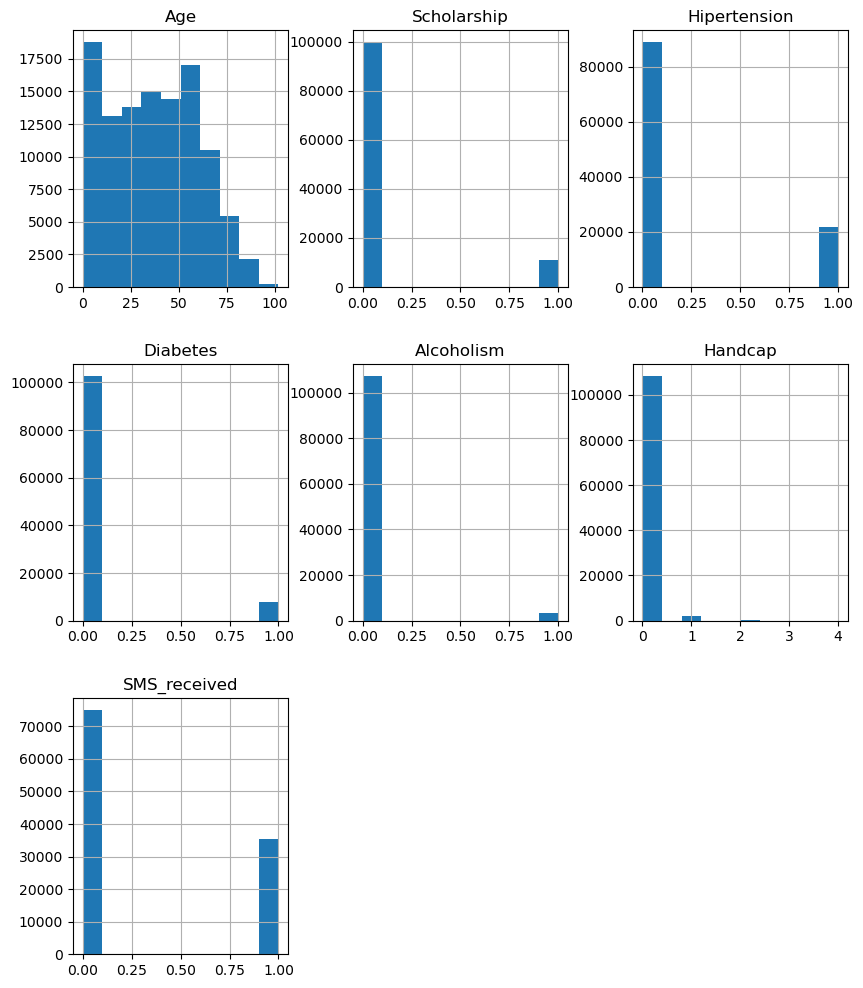

In [237]:
#General overview 
df.hist(figsize=(10,12));

# Here we can notice :
- Ages of the patients have high proportions in (0-10) i.e children and (50-60) years.
-Most of the patients do not have diabetes or drink alchol,also most of them does not have a high blood pressure.
-Patients who received SMS are lower than half of the patients who did not receive.
-Also asmall proportion of the patients are participated in the scolarship.

# What is the percentage of patients attending?

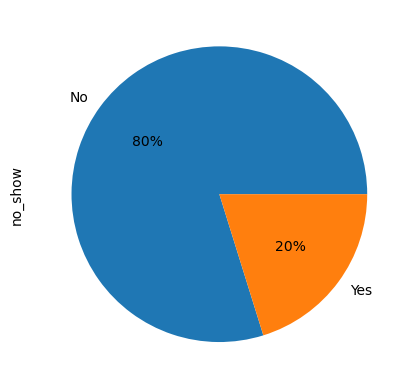

In [238]:
#we want to know percentage of show and no show patients
percent=df["no_show"].value_counts(normalize=True).mul(100).plot(kind="pie", autopct='%1.0f%%')


## we can easily notice that nearly 80% of the patients attend their  appointments, while 20% only did not.

In [259]:
#look at gender distribution
df["Gender"].value_counts(normalize=True)

F    0.649958
M    0.350042
Name: Gender, dtype: float64

nearly 2/3 of the ptients are females 

In [239]:
#divide dataframe into two groups according to show or noshow
show=df.no_show=="No"
df[show].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,88205.000000,88205.000000,88205.000000,88205.000000,88205.000000,88205.000000,88205.000000
mean,37.788753,0.093906,0.204388,0.073839,0.030418,0.022731,0.291333
std,23.336014,0.291700,0.403256,0.261511,0.171735,0.162719,0.454379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [240]:
noshow=df.no_show=="Yes"
df[noshow].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,22316.000000,22316.000000,22316.000000,22316.00000,22316.000000,22316.000000,22316.000000
mean,34.306820,0.115522,0.169027,0.06408,0.030337,0.020165,0.438430
std,21.947486,0.319659,0.374784,0.24490,0.171517,0.156268,0.496206
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,51.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,98.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000


## from the previous tables we can observe:
 
- No significant difference in mean age for show and no-show.                                                                    
- contrary to what is expected patients who attended their appoinments have a mean of 30% receiving Sms while noshow patients 43% received sms which raises a question mark about sms sending strategy.






## What is the most significant variable affecting show percentage? 

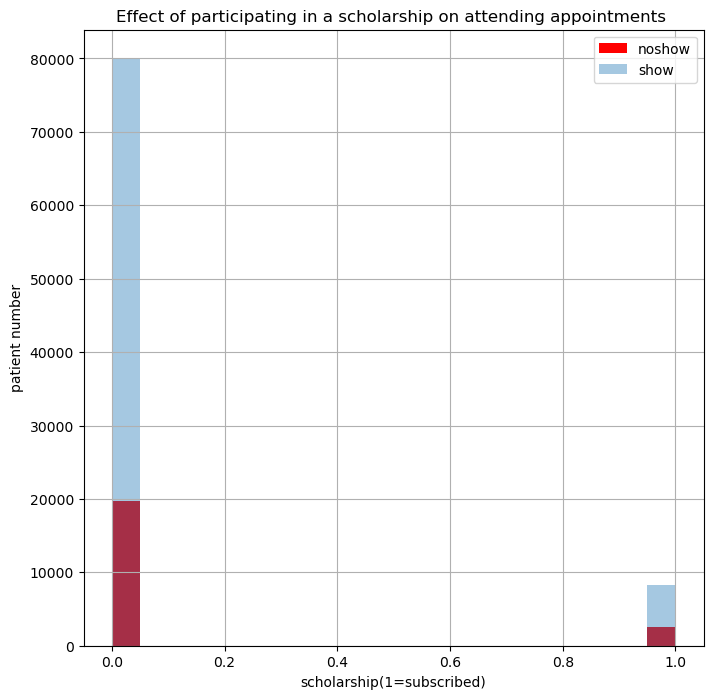

In [241]:
#we start to inpect effect of different variables on show and no-show values starting from scolarship participating
plt.figure(figsize=(8,8))
df.Scholarship[noshow].hist(alpha=1.0,color="red",bins=20,label="noshow")
df.Scholarship[show].hist(alpha=0.4,bins=20,label="show")
plt.legend()
plt.title("Effect of participating in a scholarship on attending appointments ")
plt.xlabel("scholarship(1=subscribed)")
plt.ylabel("patient number");

In [201]:
#calculating percent of show and noshow according to having a scholarship
df.groupby("Scholarship")["no_show"].value_counts(normalize=True)*100

Scholarship  no_show
0            No         80.194662
             Yes        19.805338
1            No         76.263696
             Yes        23.736304
Name: no_show, dtype: float64

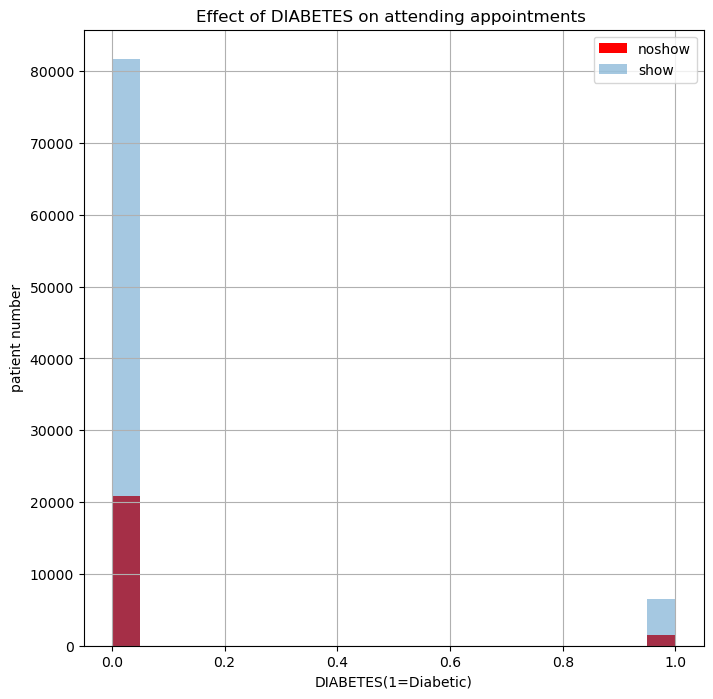

In [242]:
#Diabetes
plt.figure(figsize=(8,8))
df.Diabetes[noshow].hist(alpha=1.0,color="red",bins=20,label="noshow")
df.Diabetes[show].hist(alpha=0.4,bins=20,label="show")
plt.legend()
plt.title("Effect of DIABETES on attending appointments ")
plt.xlabel("DIABETES(1=Diabetic)")
plt.ylabel("patient number");


In [246]:
#calculating percent of show and noshow according to Diabetes
df.groupby("Diabetes")["no_show"].value_counts(normalize=True)

Diabetes  no_show
0         No         0.796389
          Yes        0.203611
1         No         0.819967
          Yes        0.180033
Name: no_show, dtype: float64

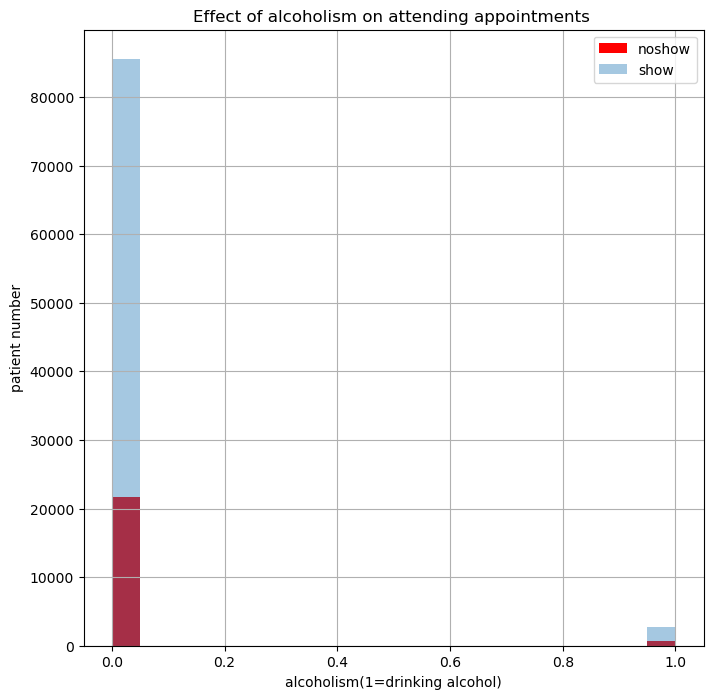

In [244]:
#Drinking alchol 
plt.figure(figsize=(8,8))
df.Alcoholism[noshow].hist(alpha=1.0,color="red",bins=20,label="noshow")
df.Alcoholism[show].hist(alpha=0.4,bins=20,label="show")
plt.legend()
plt.title("Effect of alcoholism on attending appointments ")
plt.xlabel("alcoholism(1=drinking alcohol)")
plt.ylabel("patient number");

In [247]:
#calculating percent of show and noshow according to alcholism
df.groupby("Alcoholism")["no_show"].value_counts(normalize=True)

Alcoholism  no_show
0           No         0.798070
            Yes        0.201930
1           No         0.798512
            Yes        0.201488
Name: no_show, dtype: float64

## From this tables we can easily observe that alcholism ,diabetes,scholarship have no significant effect on show percentage of patients.

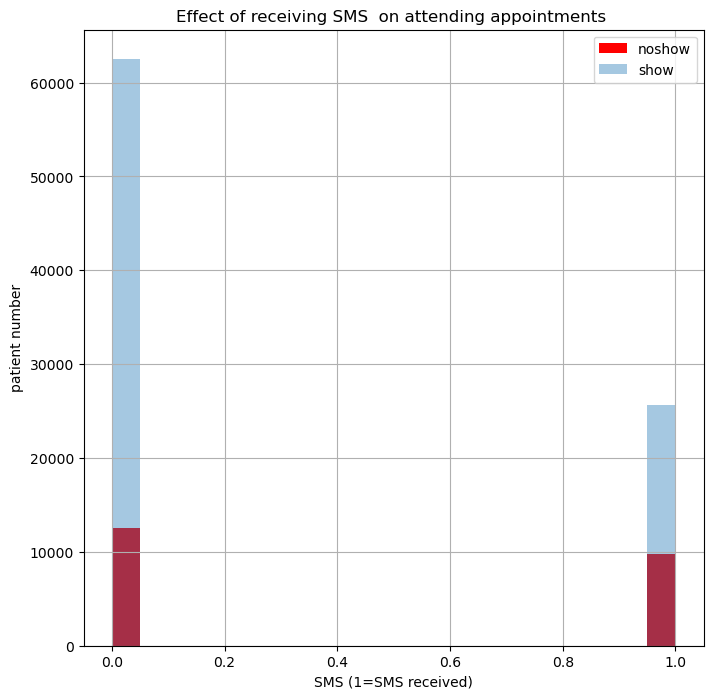

In [251]:
 #to know effect of receiving SMS on show ratio
 plt.figure(figsize=(8,8))
df.SMS_received[noshow].hist(alpha=1.0,color="red",bins=20,label="noshow")
df.SMS_received[show].hist(alpha=0.4,bins=20,label="show")
plt.legend()
plt.title("Effect of receiving SMS  on attending appointments ")
plt.xlabel("SMS (1=SMS received)")
plt.ylabel("patient number");

In [257]:
#calculating percent of show and noshow according to receiving SMS
df.groupby("SMS_received")["no_show"].value_counts(normalize=True)*100

SMS_received  no_show
0             No         83.299574
              Yes        16.700426
1             No         72.424678
              Yes        27.575322
Name: no_show, dtype: float64

In [258]:
#also we want to know how much of the patients received SMS
df["SMS_received"].value_counts(normalize=True)*100

0    67.896599
1    32.103401
Name: SMS_received, dtype: float64

- 67% of the patients did not receive SMS.

- Even those who received SMS , it didnot show significant effect on show percentage.

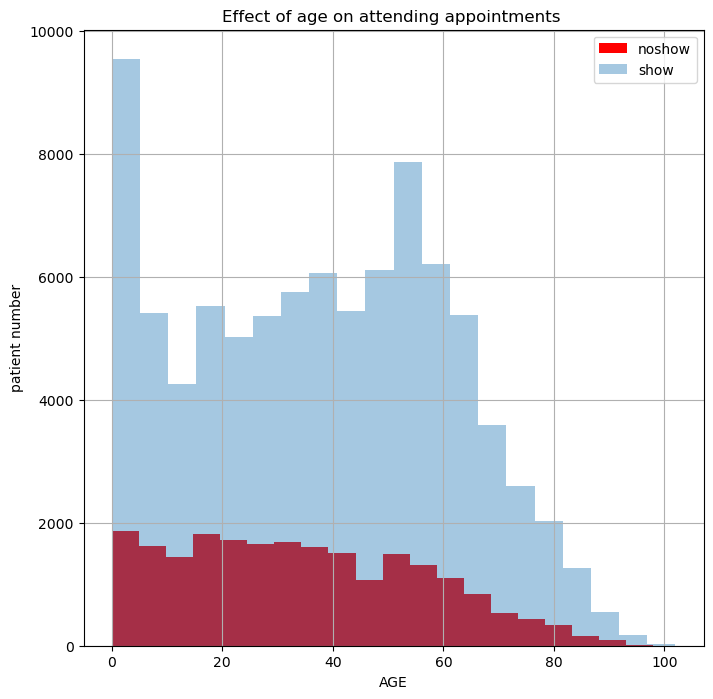

In [261]:
#effect of age on show and no-show percentage
plt.figure(figsize=(8,8))
df.Age[noshow].hist(alpha=1.0,color="red",bins=20,label="noshow")
df.Age[show].hist(alpha=0.4,bins=20,label="show")
plt.legend()
plt.title("Effect of age on attending appointments ")
plt.xlabel("AGE")
plt.ylabel("patient number");

### looks like we want to divide age to groups 

In [264]:
#add a new column showing age decade
bin_edges=[0,10,20,30,40,50,60,70,80,90,100]
bin_names=["ten","twenty","thirty","forty","fifty","sixty","seventy","eighty","ninty","hundred"]
df["age_group"]=pd.cut(df[show]["Age"],bin_edges,labels=bin_names)
df[show].head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,age_group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,seventy
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,sixty
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,seventy
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,ten
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,sixty


In [265]:
bin_edges=[0,10,20,30,40,50,60,70,80,90,100]
bin_names=["ten","twenty","thirty","forty","fifty","sixty","seventy","eighty","ninty","hundred"]
df["age_group"]=pd.cut(df[noshow]["Age"],bin_edges,labels=bin_names)
df[noshow].head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,age_group
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,thirty
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,forty
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,thirty
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes,forty
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,thirty


In [266]:
bin_edges=[0,10,20,30,40,50,60,70,80,90,100]
bin_names=["ten","twenty","thirty","forty","fifty","sixty","seventy","eighty","ninty","hundred"]
df["age_group"]=pd.cut(df["Age"],bin_edges,labels=bin_names)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,age_group
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,seventy
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,sixty
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,seventy
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,ten
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,sixty


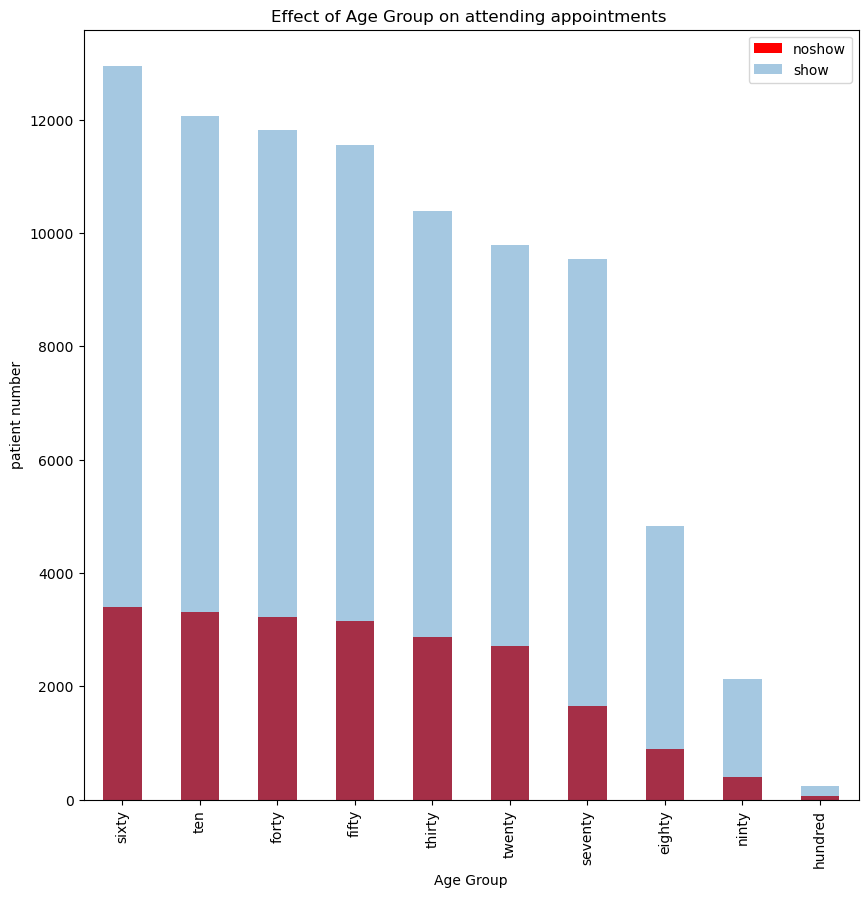

In [267]:
#look at effect of age group on show percentage
plt.figure(figsize=(10,10))
df.age_group[noshow].value_counts().plot(kind="bar",alpha=1.0,color="red",label="noshow")
df.age_group[show].value_counts().plot(kind="bar",alpha=0.4,label="show")
plt.legend()
plt.title("Effect of Age Group on attending appointments ")
plt.xlabel("Age Group")
plt.ylabel("patient number");

In [211]:
df.groupby("age_group")["no_show"].value_counts(normalize=True)*100

age_group  no_show
ten        No         79.296515
           Yes        20.703485
twenty     No         74.746164
           Yes        25.253836
thirty     No         75.375463
           Yes        24.624537
forty      No         78.527770
           Yes        21.472230
fifty      No         80.097087
           Yes        19.902913
sixty      No         82.625631
           Yes        17.374369
seventy    No         85.271249
           Yes        14.728751
eighty     No         84.460759
           Yes        15.539241
ninty      No         84.001572
           Yes        15.998428
hundred    No         80.398671
           Yes        19.601329
Name: no_show, dtype: float64

# Here we can conclude:
- The largest patient age group is (60-70 years) and then children less than 10 years 

- The lower patient age groups are from (70 -90 years)

- The highest show percent is (70-80 years) which is 85% and the lowest one is (20-30 years) which is 74%

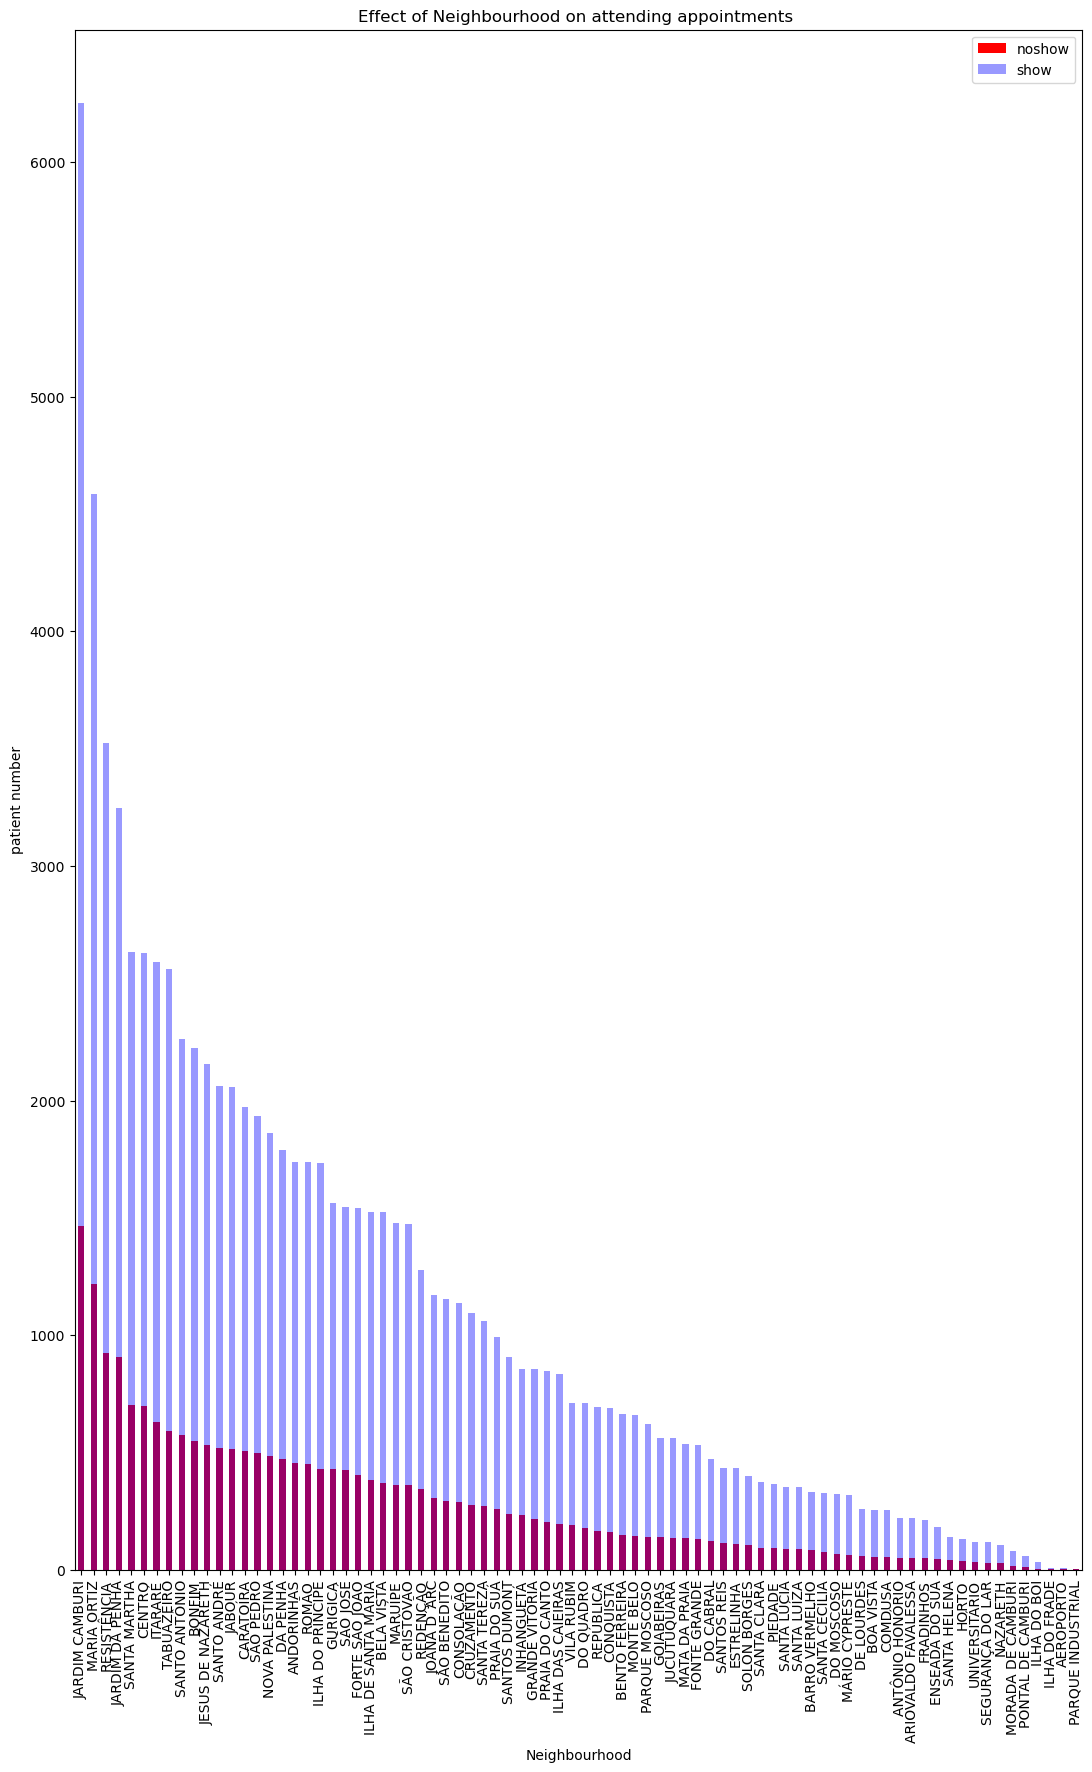

In [268]:
#effect of neighbourhood
plt.figure(figsize=(13,20))
df.Neighbourhood[noshow].value_counts().plot(kind="bar",alpha=1.0,color="red",label="noshow")
df.Neighbourhood[show].value_counts().plot(kind="bar",alpha=0.4,color="blue",label="show")
plt.legend()
plt.title("Effect of Neighbourhood on attending appointments ")
plt.xlabel("Neighbourhood")
plt.ylabel("patient number");

In [273]:
#we want to know no.of unique places 
df["Neighbourhood"].nunique()

81

In [274]:
#calculating percent of show and noshow according to neighbourhood
pd.options.display.max_rows = None# to display the whole data not only first 5 rows
pd.options.display.max_columns = None
df.groupby("Neighbourhood")["no_show"].value_counts(normalize=True)*100

Neighbourhood                no_show
AEROPORTO                    No          87.500000
                             Yes         12.500000
ANDORINHAS                   No          77.059345
                             Yes         22.940655
ANTÔNIO HONÓRIO              No          81.549815
                             Yes         18.450185
ARIOVALDO FAVALESSA          No          78.014184
                             Yes         21.985816
BARRO VERMELHO               No          78.486998
                             Yes         21.513002
BELA VISTA                   No          79.863660
                             Yes         20.136340
BENTO FERREIRA               No          77.505828
                             Yes         22.494172
BOA VISTA                    No          81.410256
                             Yes         18.589744
BONFIM                       No          80.165885
                             Yes         19.834115
CARATOÍRA                    No          76.9

In [272]:
#also  number  of patients in each neighbourhood
pd.options.display.max_rows = None# to display the whole data not only first 5 rows
pd.options.display.max_columns = None
df.groupby("Neighbourhood")["no_show"].value_counts()

Neighbourhood                no_show
AEROPORTO                    No            7
                             Yes           1
ANDORINHAS                   No         1740
                             Yes         518
ANTÔNIO HONÓRIO              No          221
                             Yes          50
ARIOVALDO FAVALESSA          No          220
                             Yes          62
BARRO VERMELHO               No          332
                             Yes          91
BELA VISTA                   No         1523
                             Yes         384
BENTO FERREIRA               No          665
                             Yes         193
BOA VISTA                    No          254
                             Yes          58
BONFIM                       No         2223
                             Yes         550
CARATOÍRA                    No         1974
                             Yes         591
CENTRO                       No         2631
                  

# From this analysis we can observe:

- Great variation in patient number among brazilian regions ranging from only 1 patient in  (PARQUE INDUSTRIAL) to 7717 patients in(JORDAN CAMBURI).

- Also observed variation in show/noshow percentage from 71% in(SANTOS DUMONT) to 87.5% in(AEROPORTO)





<a id='conclusions'></a>
## Conclusions
- 2/3 of patients are females.
- 80% of the patients attended their appointments.
- The most factors affecting patients show are age and neighbourhood.
- Great variety in patient number and show percentage  among different brazilian regions.
-SMS sending strategy need to be modified.


In [275]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1